# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [8]:
# Import necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
# load `winequality_edited.csv`
wines = pd.read_csv("winequality_edited.csv")
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples.

In [10]:
# Use query to select each group and get its mean quality
wines['alcohol_level'] = pd.cut(wines['alcohol'], bins=[0, wines['alcohol'].mean(), wines['alcohol'].max()], labels=['low', 'high'])
wines['alcohol_level'].value_counts()

low     3491
high    3006
Name: alcohol_level, dtype: int64

In [11]:
alcohol_means = wines.groupby('alcohol_level')['quality'].mean()
alcohol_means

alcohol_level
low     5.502721
high    6.184963
Name: quality, dtype: float64

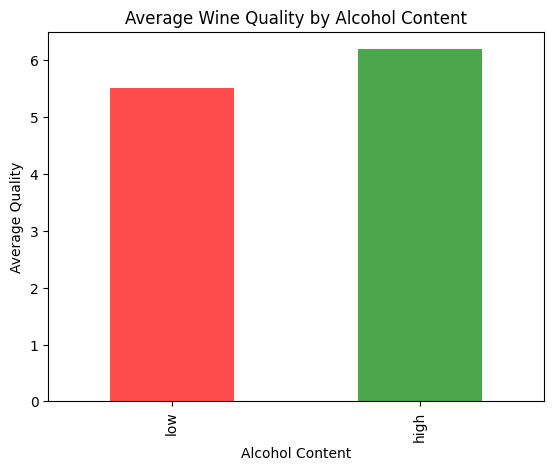

In [12]:
# Create a bar chart with proper labels

ax = alcohol_means.plot(kind='bar', color=['red', 'green'], alpha=0.7)

ax.set_title('Average Wine Quality by Alcohol Content')
ax.set_xlabel('Alcohol Content')
ax.set_ylabel('Average Quality')


plt.show()

### #2: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [13]:
# Use groupby to get the mean quality for each acidity level
acidity_means = wines.groupby('acidity_levels')['quality'].mean()
acidity_means

acidity_levels
high        5.783469
low         5.859593
medium      5.850832
mod_high    5.784540
Name: quality, dtype: float64

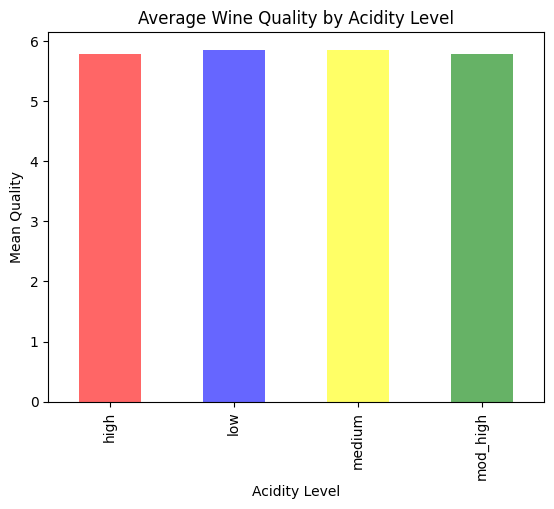

In [14]:
# Create a bar chart with proper labels
ax = acidity_means.plot(kind='bar', color=['red', 'blue', 'yellow', 'green'], alpha=0.6)

ax.set_title('Average Wine Quality by Acidity Level')
ax.set_xlabel('Acidity Level')
ax.set_ylabel('Mean Quality')

plt.show()